# Phylodynamic model adequacy (test diversification rates)

In [5]:
library(TreeSim)
library(TreePar)
library(NELSI)

In [6]:
set.seed(10)

In [7]:
nspecies <- 100
time <- c(0, 1)
rho <- c(0.5, 1) #sampling proportion
lambda <- c(2, 5)#spec rate
mu <- c(1.5, 0)#extinction rate

In [8]:
tree <- sim.rateshift.taxa(nspecies, 1, lambda, mu, frac = rho, times = time, complete = F)

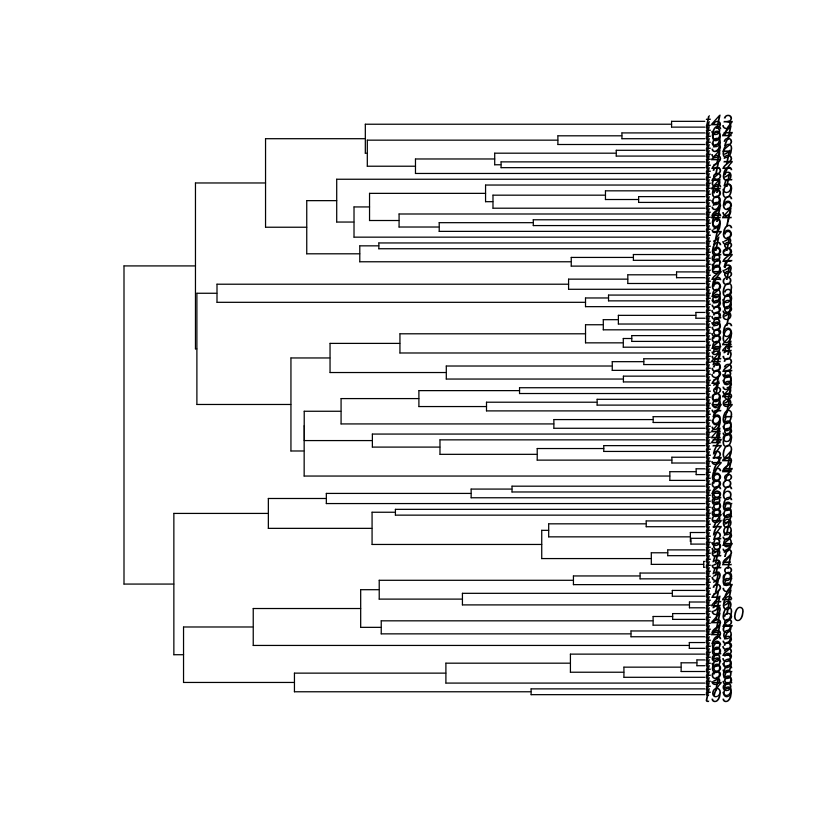

In [9]:
plot(tree[[1]])

In [10]:
x <- sort(getx(tree[[1]]), decreasing = T)
nt <- sort(intnode.times(tree[[1]]), decreasing = T)
#print(nt - x)

In [11]:
#to allow shift times to be 0.6, 0.8, 1, 1.2, ..., 2.4
start <- 0.4
end <- 2
grid <- 0.2

In [12]:
#fix rho and estimate time, lambda, and mu
res <- bd.shifts.optim(x, c(rho, 1), grid, start, end)[[2]]

[1] "startest"
[1] "test"
[1] 1.0 0.4
[1] 6.368305e+01 9.219610e-01 2.805139e-08 2.303792e-01 2.438249e+00
[6] 4.000000e-01
[1] 1.0 0.6
[1] 6.242244e+01 9.282312e-01 1.973013e-08 2.220083e-01 2.942733e+00
[6] 6.000000e-01
[1] 1.0 0.8
[1] 6.144315e+01 8.288173e-01 4.679411e-08 4.893440e-01 3.422076e+00
[6] 8.000000e-01
[1] 1 1
[1] 60.6940763  0.6831439  0.1889654  0.8056904  3.6622060  1.0000000
[1] 1.0 1.2
[1] 6.389500e+01 3.188225e-01 3.537533e-07 1.465373e+00 3.295377e+00
[6] 1.200000e+00
[1] 1.0 1.4
[1] 6.476335e+01 1.601990e-01 1.288137e-06 1.689515e+00 3.162373e+00
[6] 1.400000e+00
[1] 1.0 1.6
[1] 6.523679e+01 6.785847e-02 1.574079e-06 1.800323e+00 3.254172e+00
[6] 1.600000e+00
[1] 1.0 1.8
[1]  6.422557e+01  3.457427e-08  2.521095e+00  1.867168e+00 -1.225118e+01
[6]  1.800000e+00
[1] 1 2
[1] 6.567651e+01 5.031823e-03 1.711228e-05 1.874485e+00 1.002251e-04
[6] 2.000000e+00
[[1]]
[1] 6.574452e+01 2.508937e-07 1.877696e+00

[[2]]
[1] 60.6940763  0.6831439  0.1889654  0.8056904  3.662

In [13]:
res[[2]] # maximum likelihood estimate for one rate shift
#first is -loglik, turnover (for more recent that 1.0), turnover (before 1.0)
#net diversification rate more ancestral and earlier than 1.0
#

[1] 60.6940763  0.6831439  0.1889654  0.8056904  3.6622060  1.0000000

In [14]:
res

[[1]]
[1] 6.574452e+01 2.508937e-07 1.877696e+00

[[2]]
[1] 60.6940763  0.6831439  0.1889654  0.8056904  3.6622060  1.0000000

[[3]]
[1] 5.982266e+01 8.284403e-01 3.706772e-07 2.460350e-06 4.945623e-01
[6] 5.902695e+00 3.391462e+00 1.000000e+00 1.200000e+00

In [15]:
#values used for simulation
print(mu/lambda)
print(lambda - mu)

[1] 0.75 0.00
[1] 0.5 5.0


In [16]:
# Test if 1 shift explaines the tree signifficantly better than 0 shifts:
i <- 1
test <- pchisq(2*(res[[i]][1] - res[[i+1]][1]), 3)
test

[1] 0.9822723

In [17]:
#test if 2 shifts explain the tree significantly better than 1 shift:
i<-2
test<-pchisq(2*(res[[i]][1]-res[[i+1]][1]),3)
test

[1] 0.3725474

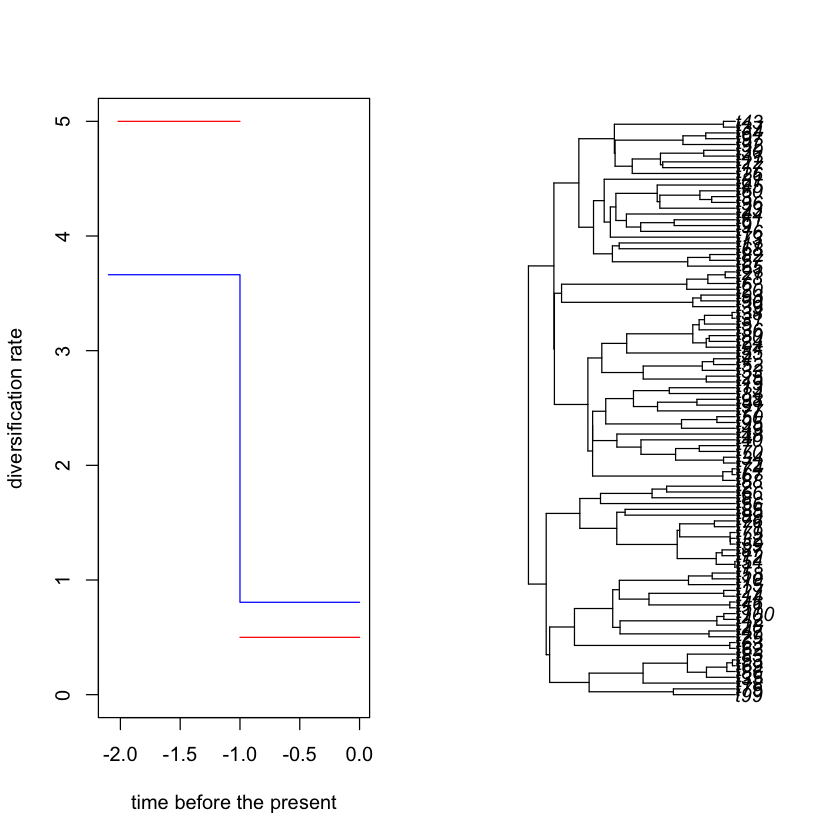

In [36]:
par(mfrow = c(1, 2))
# Plot parameter estimates
bd.shifts.plot(list(res),1,2.1,0,5)
# Plot parameters used for simulation
lines(c(-max(x),-time[2]),c((lambda-mu)[2],(lambda-mu)[2]),col="red")
lines(c(-time[2],0),c((lambda-mu)[1],(lambda-mu)[1]),col="red")
plot(tree[[1]])